# Importing the library
The first step involves importing the library. we have imported all the important tools numpy, pandas, matplotlib and sklearn that we will require for our problem.

In [61]:
# import the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# Load and Clean the DataSet
The data set provided is in the form of CSV file. The data for traing and validation are provided in a seaprate excel files. The first step in any machine learning project involves cleaning of data. The primary requirement of any model is to have clean data for training. The data provided consists of total 31 columns and 94000 rows. The first 30 column belong to input x having 30 features and the last column is target variable. The problem is classification problem as the target variable is not continous. Another interesting thing to be noticed is that the data does not contain NaN values. But, looking the data carefully we observed some abrupt 0 values in some columns, those 0 values are replaced with NaN. In the later section NaN will be replaced with the mean values in the column using sklearn imputer class. 

In [62]:
#Loading the data set
dataset_train = pd.read_csv('Data Science HW design model.csv')
dataset_val = pd.read_csv('Data Science HW design val.csv')
X_train = dataset_train.iloc[:, :-1]
X_val = dataset_val.iloc[:,:-1]
# many values are ubruptly zero, applying the replacement 0 with NaN
X_train = X_train.replace(0,np.nan)
X_val = X_val.replace(0,np.nan)

In [63]:
# Importing imputer class from sklearn library to fill NaN values with the mean.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
imputer.fit(X_train.values)
imputer.fit(X_val.values)
X_train = imputer.transform(X_train.values)
X_val = imputer.transform(X_val.values)

The training and validation dataset will be loaded from separte excel files

In [64]:
# Spliting the testing and training data based on the csv files
#x_train = X_train.iloc[:,:-1].values
x_train = X_train
y_train = dataset_train.iloc[:,-1].values
#x_test = X_test.iloc[:, :-1].values
x_val = X_val
y_val = dataset_val.iloc[:, -1].values

The data provided is unbalanced data. Therefore, even with the wrong predictions, we will end up getting a very high accuracy. There can be different ways to tackle this imbalace 
- To keep the equal no. of both the dataset in minority and majority.
- Duplicating the data in minority
- Generate sythetic example using K-nearest neighbors using Smothe
Based on our data we have used smothe to adequately make a balance between the data.

In [65]:
# Data is imbalanced, therefore using smote() to generate a balanced dataset
oversampler = SMOTE()
print('#1: ', np.sum(y_train), '#0:', np.sum(1-y_train))
x_train, y_train = oversampler.fit_resample(x_train, y_train)
print('#1: ', np.sum(y_train), '#0:', np.sum(1-y_train))

#1:  4000 #0: 90000
#1:  90000 #0: 90000


The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 
So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

In [66]:
# Performing Standard scaling on the data set
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

# Logistic Regression

In [67]:
# Initializing the Logistic Regression classifier
classifier_logres = LogisticRegression(random_state = 0)
classifier_logres.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [68]:
# Predict the value from the classifier
y_pred_logres = classifier_logres.predict(sc.transform(x_val))
y_pred_logres_prob = classifier_logres.predict_proba(sc.transform(x_val))
result1_log = np.concatenate((y_pred_logres.reshape(len(y_pred_logres),1), y_val.reshape(len(y_val),1)),1)


In [69]:
# # Initializing the confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logres = confusion_matrix(y_val, y_pred_logres)
print(cm_logres)
acc_logres = accuracy_score(y_val, y_pred_logres)
print('Accuracy score using Logistic Regression Model is', acc_logres)
print('F1 score using Logistic Regression Model is', f1_score(y_val, y_pred_logres))

[[6355 3645]
 [ 632  868]]
Accuracy score using Logistic Regression Model is 0.6280869565217392
F1 score using Logistic Regression Model is 0.28870779976717115


For the given dataset, accuracy in not the proper metric for evaluation as the dataset is unbalanced. Therefore, F1 score is evaluated

## Hyperparameter Tuning for Logistic Regression

In [70]:
# Initializing grid search and passing dictionary as input 
par_grid_logres = [
    {'penalty' : ['l1','l2','none'] ,
     'C' : np.logspace(-2,2,10),
     'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter': [100,1000,2500,5000]
    }
]

## Train Testing data split
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. It divides the data into k set and where set will be choosen randomly as for testing to training for the optimum results 

In [71]:
from sklearn.model_selection import GridSearchCV
c_logres = GridSearchCV(classifier_logres, param_grid = par_grid_logres,cv = 4, verbose = True, n_jobs = -1)

In [72]:
#Fitting best parameters
c_logres
c_logres.fit(x_train,y_train)

Fitting 4 folds for each of 600 candidates, totalling 2400 fits


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [73]:
# The best output parameters for model
c_logres.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

The following are the best for logistic regression model

## Logistic Regression classifier with hyperparameters from grid search
Grid search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. 

In [89]:
classifier_logres1 = LogisticRegression(penalty = 'l1', C = 0.01, max_iter = 100, solver = 'saga')
classifier_logres1.fit(x_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [90]:
y_pred_logres1 = classifier_logres1.predict(x_val)
y_pred_logres1_prob = classifier_logres1.predict_proba(x_val)
result1 = y_pred_logres1.copy()
pd.DataFrame(result1).to_csv("result1.csv")

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logres1 = confusion_matrix(y_val, y_pred_logres1)
print(cm_logres1)
acc_logres1 = accuracy_score(y_val, y_pred_logres1)
print('Accuracy score using Logistic Regression Model is', acc_logres1)
print('F1 score using Logistic Regression Model is', f1_score(y_val, y_pred_logres1))

[[7627 2373]
 [ 395 1105]]
Accuracy score using Logistic Regression Model is 0.7593043478260869
F1 score using Logistic Regression Model is 0.44395339493772595


Significance of Hyperparameter tuning:
Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.
There is a drastic improvement in model after hyperparameter tuning for Logistic regression 


# Feature Importance

Feature: 0, Score: -0.00832
Feature: 1, Score: -0.00786
Feature: 2, Score: 0.14970
Feature: 3, Score: 0.00481
Feature: 4, Score: -0.00655
Feature: 5, Score: -0.00529
Feature: 6, Score: -0.13365
Feature: 7, Score: 0.00556
Feature: 8, Score: 0.01606
Feature: 9, Score: 0.00473
Feature: 10, Score: -0.00253
Feature: 11, Score: 0.16527
Feature: 12, Score: 0.01080
Feature: 13, Score: -0.00466
Feature: 14, Score: 0.16413
Feature: 15, Score: 0.00100
Feature: 16, Score: -0.00030
Feature: 17, Score: -0.00573
Feature: 18, Score: -0.24670
Feature: 19, Score: 0.13191
Feature: 20, Score: -0.00727
Feature: 21, Score: -0.35767
Feature: 22, Score: 0.00106
Feature: 23, Score: 0.00593
Feature: 24, Score: -0.21734
Feature: 25, Score: 0.01313
Feature: 26, Score: 0.00514
Feature: 27, Score: -0.20750
Feature: 28, Score: -0.00073
Feature: 29, Score: -0.20305


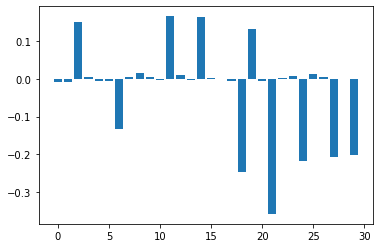

In [92]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=94000, n_features=30, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In the section, importance of differnt features are evaluated.
The coefficients are both positive and negative. The positive scores indicate how the feature that predicts 1, whereas the negative scores indicate a feature that predicts class 0.
Feature 2,11,14,19 has more influnece on the predicting 1, Whereas feature 18,21,24,27 and 29 has more influence in predicting 0

# Decison Tree Classification Model

In [93]:
#Initializing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier_dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dectree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [94]:
# Pediction based on decision tree classifier
y_pred_dectree = classifier_dectree.predict(x_val)
y_pred_dectree_prob = classifier_dectree.predict_proba(x_val)
resulttree = y_pred_dectree.copy()

In [95]:
# Confusion Matrix to compare the score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dectree = confusion_matrix(y_val, y_pred_dectree)
print(cm_dectree)
accr_dectree = accuracy_score(y_val, y_pred_dectree)
print(accr_dectree)
print('F1 score using Decision Tree is', f1_score(y_val, y_pred_dectree))

[[9337  663]
 [1169  331]]
0.8406956521739131
F1 score using Decision Tree is 0.2654370489174018


## Hyperparameter tuning for Decision Tree classification Model

In [96]:

from sklearn.model_selection import GridSearchCV
treepara = {'criterion':['gini','entropy'],'max_depth':[5,25,50,100,150]}
c_dectree = GridSearchCV(classifier_dectree, treepara, cv =5,n_jobs =-1)
c_dectree.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 25, 50, 100, 150]})

In [97]:
c_dectree.best_params_

{'criterion': 'entropy', 'max_depth': 50}

 The following are the best parameters for the Decision Tree Model

In [98]:
classifier_dectree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 50)
classifier_dectree1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [99]:
y_pred_dectree1 = classifier_dectree.predict(x_val)
y_pred_dectree1_prob = classifier_dectree.predict_proba(x_val)
result2 = y_pred_dectree1.copy()
pd.DataFrame(result2).to_csv("result2.csv")

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dectree1 = confusion_matrix(y_val, y_pred_dectree1)
print(cm_dectree1)
accr_dectree1 = accuracy_score(y_val, y_pred_dectree1)
print('Accuracy Decision Tree',accr_dectree1)
print('F1 score Decision Tree',f1_score(y_val,y_pred_dectree1))

[[9337  663]
 [1169  331]]
Accuracy Decision Tree 0.8406956521739131
F1 score Decision Tree 0.2654370489174018


## Model performance
F1 score metric used for evaluating the model. It has been found based on the confusion matrix and F1 score, Logistic regression model is performing better.
For getting more confidence on the model, an additional exercise is done to perform the prediction using the Artificial Neural Network

# Artificial Neural Network

In [101]:
#using neural Network
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=24, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

The input layer is connected to the output layer using the hidden layers.
The drop out layers has been introduced for regularization.

In [102]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'AUC')

In [103]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.5374 - auc: 0.8123
Epoch 2/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.5055 - auc: 0.8351
Epoch 3/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.4947 - auc: 0.8432
Epoch 4/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.4881 - auc: 0.8478
Epoch 5/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.4836 - auc: 0.8511
Epoch 6/50
5625/5625 [==============================] - 8s 1ms/step - loss: 0.4771 - auc: 0.8556
Epoch 7/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.4709 - auc: 0.8598
Epoch 8/50
5625/5625 [==============================] - 7s 1ms/step - loss: 0.4667 - auc: 0.8625
Epoch 9/50
5625/5625 [==============================] - 8s 1ms/step - loss: 0.4623 - auc: 0.8654
Epoch 10/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.4624 - auc: 0.8655
Epoch 11/50
5625/5625 [======

In [104]:
y_pred_ann_prob = ann.predict(x_val)
y_pred_ann = y_pred_ann_prob.copy()
threshold = 0.5
#print('F1 Score:', f1_score(y_test, y_pred_ann > threshold))
#print('Acc Score:', np.sum(y_test == (y_pred_ann > threshold))/len(y_test))
for i in range(len(y_pred_ann)):
    if y_pred_ann[i] >= threshold:
        y_pred_ann[i] = 1
    else:
        y_pred_ann[i] = 0
print('F1 Score NN:', f1_score(y_val, y_pred_ann)) 

F1 Score NN: 0.45218680504077097


# Model Comparison based on AUC (Area Under the ROC Curve)

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score
#random_probs = [0 for _ in range(len(y_val))]
random_probs = [np.random.randint(2) for _ in range(len(y_val))]
random_auc = roc_auc_score(y_val, random_probs)
logres_auc = roc_auc_score(y_val, y_pred_logres1_prob[:,1])
dectree = roc_auc_score(y_val, y_pred_dectree1_prob[:,1])
ann_d = roc_auc_score(y_val, y_pred_ann_prob)

In [106]:
print('Logistic Regression: AUROC = %.3f' % (logres_auc))
print('Decision Tree: AUROC = %.3f' % (dectree))
print('Neural network: AUROC = %.3f' % (ann_d))

Logistic Regression: AUROC = 0.822
Decision Tree: AUROC = 0.577
Neural network: AUROC = 0.798


In [107]:
r_fpr, r_tpr, _ = roc_curve(y_val, random_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_val, y_pred_logres1)
nb_fpr, nb_tpr, _ = roc_curve(y_val, y_pred_dectree1)
nn_fpr, nn_tpr, _ = roc_curve(y_val, y_pred_ann_prob)

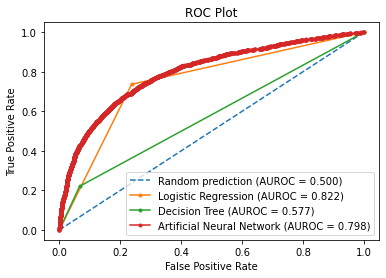

In [108]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logres_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dectree)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_d)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# CONCLUSION
The F1 score metric is used for model performance performace evaluation. The models choosen for the compariosn are Logistic Regression and Decision Tree classifier. Additionally model prediction using ANN is also done for developing the better understanding.   
F1 Scores for the models are evaluated as:
- F1 Score Logistic Regression : 0.44
- F1 Score Decision Tree Classifier : 0.27
- F1 Score Artificial Neural Network : 0.45
F1 score is the metric based on the true positive and false negative from the confusion matrix. The Logistic regression and ANN has perfored well in comparison to the decision tree based on the F  Score.\\
The ROC (Receiver Operating Charateristics curve) summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis. \\
Area under the ROC (AUC) provides a better overview to choose the model. Based on our data, Logistic regression has performed better in comparison to the degision tree. The improvement in the Logistic regression model after hyperparameter tuning and using L1 regulizer to fix the problem of under fitting and overfitting. It is used to balance the variance bais tradeoff.